In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("project2.csv")

/tmp/ipykernel_261/1766906438.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
data.shape

(286, 10)

In [4]:
data.size

2860

In [5]:
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
data.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [7]:
data['class'].unique() # need to do one hot encoding on class

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [8]:
data['age'].unique() # need to do research on how to handle ranges

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [9]:
data['menopause'].unique() # needs one hot encoding

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [10]:
data['tumor-size'].unique() # might need scaling

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [11]:
data['inv-nodes'].unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [12]:
data['node-caps'].unique() # missing data and needs one hot encoding

array(['no', 'yes', '?'], dtype=object)

In [13]:
data['deg-malig'].unique()

array([3, 2, 1])

In [14]:
data['breast'].unique() # needs one hot encoding

array(['left', 'right'], dtype=object)

In [15]:
data['breast-quad'].unique() # missing data

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [16]:
data['irradiat'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
def replace(s):
    x = s.split('-')
    x1 = int(x[0])
    x2 = int(x[1])
    return (x1+x2)/2 

In [18]:
data['age'] = data['age'].apply(replace).astype(float)
data['tumor-size'] = data['tumor-size'].apply(replace).astype(float)
data['inv-nodes'] = data['inv-nodes'].apply(replace).astype(float)

In [19]:
data[data['breast-quad'] == "?"] # just one row is missing data and there is no way to get the value so we will just remove it
data = data.drop([206])
data[data['breast-quad'] == "?"]
data.shape # one row was removed

(285, 10)

In [20]:
data[data['node-caps'] == "?"] # repeat for node-caps since there does not seem to be one thing that tells us if it should be yes or no

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,44.5,premeno,27.0,1.0,?,2,left,right_low,yes
163,no-recurrence-events,64.5,ge40,27.0,4.0,?,1,right,left_up,yes
164,no-recurrence-events,64.5,ge40,27.0,4.0,?,1,right,left_low,yes
183,no-recurrence-events,54.5,ge40,32.0,10.0,?,3,left,left_up,yes
184,no-recurrence-events,54.5,ge40,32.0,10.0,?,3,left,left_low,yes
233,recurrence-events,74.5,ge40,17.0,10.0,?,1,left,left_low,yes
263,recurrence-events,54.5,lt40,22.0,1.0,?,1,left,left_up,no
264,recurrence-events,54.5,lt40,22.0,1.0,?,1,left,left_low,no


In [21]:
data.drop(data[data['node-caps'] == "?"].index,inplace=True)

In [22]:
data.shape# we dropped 8 more which is what we wanted

(277, 10)

In [23]:
sum(data.duplicated()) # 14 duplicates

14

In [24]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.shape # eliminated 14 duplicates

(263, 10)

In [25]:
data.info()# need one hot encoding for class, menopause,node caps, breast,breast quad, and irradia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        263 non-null    object 
 1   age          263 non-null    float64
 2   menopause    263 non-null    object 
 3   tumor-size   263 non-null    float64
 4   inv-nodes    263 non-null    float64
 5   node-caps    263 non-null    object 
 6   deg-malig    263 non-null    int64  
 7   breast       263 non-null    object 
 8   breast-quad  263 non-null    object 
 9   irradiat     263 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 20.7+ KB


In [26]:
data['class'] = data['class'].astype('category')
data['menopause'] = data['menopause'].astype('category')
data['node-caps'] = data['node-caps'].astype('category')
data['breast'] = data['breast'].astype('category')
data['breast-quad'] = data['breast-quad'].astype('category')
data['irradiat'] = data['irradiat'].astype('category')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    float64 
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    float64 
 4   inv-nodes    263 non-null    float64 
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    int64   
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(6), float64(3), int64(1)
memory usage: 10.7 KB


In [27]:
data = pd.get_dummies(data, columns=["class", "menopause", "node-caps","breast","breast-quad","irradiat"], drop_first=True)
data.shape

(263, 14)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      263 non-null    float64
 1   tumor-size               263 non-null    float64
 2   inv-nodes                263 non-null    float64
 3   deg-malig                263 non-null    int64  
 4   class_recurrence-events  263 non-null    bool   
 5   menopause_lt40           263 non-null    bool   
 6   menopause_premeno        263 non-null    bool   
 7   node-caps_yes            263 non-null    bool   
 8   breast_right             263 non-null    bool   
 9   breast-quad_left_low     263 non-null    bool   
 10  breast-quad_left_up      263 non-null    bool   
 11  breast-quad_right_low    263 non-null    bool   
 12  breast-quad_right_up     263 non-null    bool   
 13  irradiat_yes             263 non-null    bool   
dtypes: bool(10), float64(3), i

In [29]:
data.describe()# there is definetly some outliers

,age,tumor-size,inv-nodes,deg-malig
count,263.000000,263.000000,263.000000,263.000000
mean,50.849810,26.600760,2.562738,2.068441
std,10.094178,10.733247,3.475495,0.727770
min,24.500000,2.000000,1.000000,1.000000
25%,44.500000,22.000000,1.000000,2.000000
50%,54.500000,27.000000,1.000000,2.000000
75%,54.500000,32.000000,4.000000,3.000000
max,74.500000,52.000000,25.000000,3.000000


<Axes: ylabel='inv-nodes'>

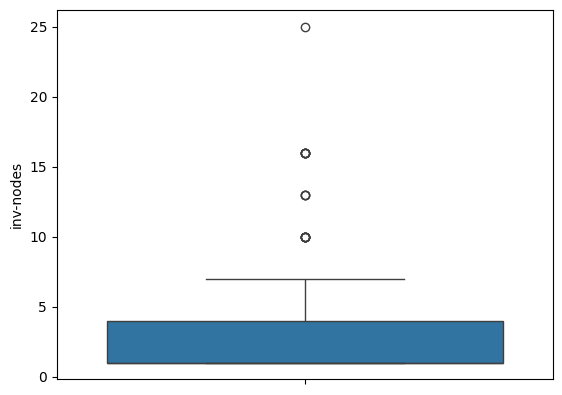

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data['inv-nodes'])

<Axes: ylabel='tumor-size'>

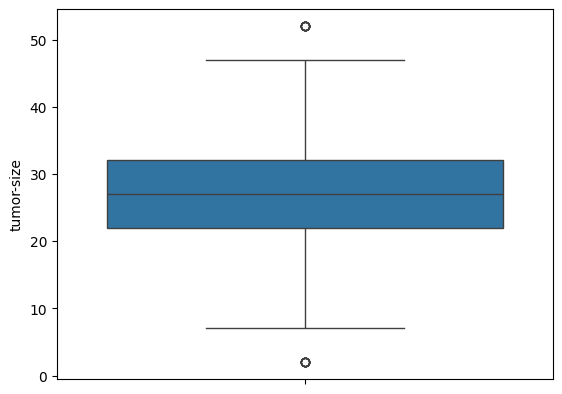

In [31]:
sns.boxplot(data=data['tumor-size']) # few outlier

<Axes: xlabel='age', ylabel='Count'>

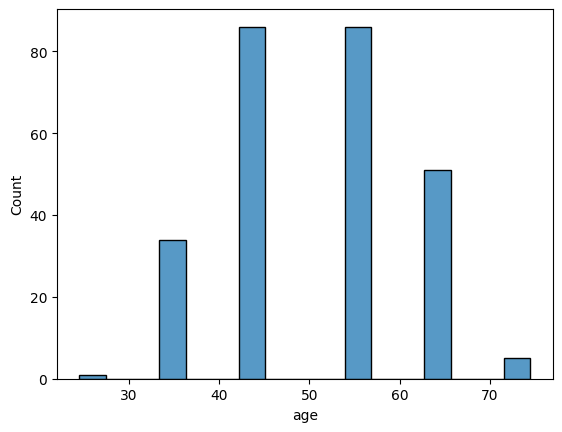

In [32]:
sns.histplot(data=data['age']) # we can see a large count between 40-60

<Axes: xlabel='deg-malig', ylabel='Count'>

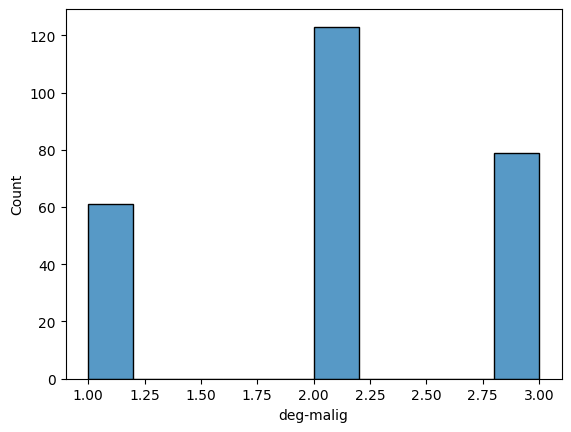

In [33]:
sns.histplot(data=data['deg-malig']) # most are 2 malig

In [34]:
data.columns

Index(['age', 'tumor-size', 'inv-nodes', 'deg-malig',
       'class_recurrence-events', 'menopause_lt40', 'menopause_premeno',
       'node-caps_yes', 'breast_right', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up',
       'irradiat_yes'],
      dtype='object')

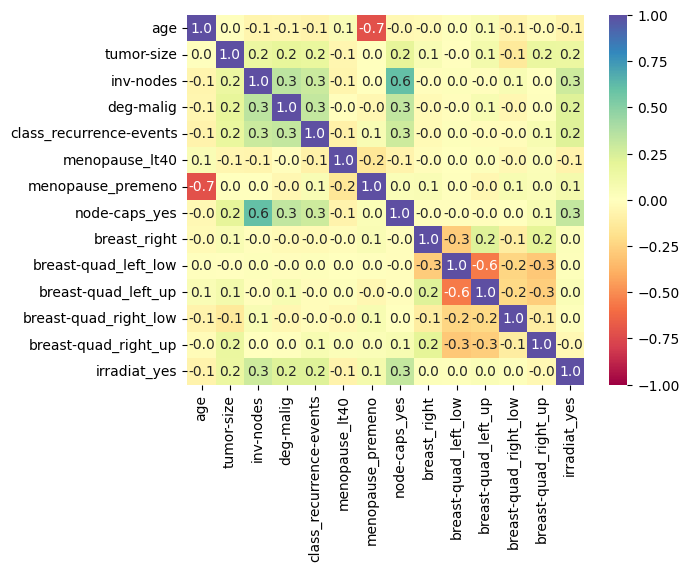

In [35]:
corr_cols = data.columns
# the actual heat map
sns.heatmap(
   data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral"
)
# show the plot
plt.show()

In [36]:
data.head()

,age,tumor-size,inv-nodes,deg-malig,class_recurrence-events,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,34.5,32.0,1.0,3,False,False,True,False,False,True,False,False,False,False
1,44.5,22.0,1.0,2,False,False,True,False,True,False,False,False,True,False
2,44.5,22.0,1.0,2,False,False,True,False,False,True,False,False,False,False
3,64.5,17.0,1.0,2,False,False,False,False,True,False,True,False,False,False
4,44.5,2.0,1.0,2,False,False,True,False,True,False,False,True,False,False


In [37]:
X = data.drop("class_recurrence-events", axis = 1)
X

,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,34.5,32.0,1.0,3,False,True,False,False,True,False,False,False,False
1,44.5,22.0,1.0,2,False,True,False,True,False,False,False,True,False
2,44.5,22.0,1.0,2,False,True,False,False,True,False,False,False,False
3,64.5,17.0,1.0,2,False,False,False,True,False,True,False,False,False
4,44.5,2.0,1.0,2,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,34.5,32.0,1.0,2,False,True,False,False,False,True,False,False,False
259,34.5,22.0,1.0,3,False,True,False,False,False,True,False,False,True
260,64.5,22.0,1.0,1,False,False,False,True,False,True,False,False,False
261,44.5,32.0,4.0,3,False,False,False,False,True,False,False,False,False


In [38]:
Y = data['class_recurrence-events']
Y

0      False
1      False
2      False
3      False
4      False
       ...  
258     True
259     True
260     True
261     True
262     True
Name: class_recurrence-events, Length: 263, dtype: bool

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=4, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, Y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 48}

In [41]:
from sklearn.metrics import classification_report
model_RFC = gscv.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, model_RFC.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, model_RFC.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       1.00      0.07      0.13        56
        True       0.31      1.00      0.47        23

    accuracy                           0.34        79
   macro avg       0.65      0.54      0.30        79
weighted avg       0.80      0.34      0.23        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.08      0.14       130
        True       0.31      1.00      0.47        54

    accuracy                           0.35       184
   macro avg       0.66      0.54      0.31       184
weighted avg       0.80      0.35      0.24       184



In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
knn_gscv = GridSearchCV(knn_model, param_grid, cv=5, scoring="recall")
knn_gscv.fit(X_train, Y_train)
knn_gscv.best_params_

{'n_neighbors': 1}

In [43]:
best_knn1 = knn_gscv.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, best_knn1.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, best_knn1.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.75      0.84      0.79        56
        True       0.44      0.30      0.36        23

    accuracy                           0.68        79
   macro avg       0.59      0.57      0.57        79
weighted avg       0.66      0.68      0.66        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       130
        True       0.95      0.96      0.95        54

    accuracy                           0.97       184
   macro avg       0.96      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [44]:
param_grid = {"n_neighbors": np.arange(5, 100)}
knn_gscv = GridSearchCV(knn_model, param_grid, cv=5, scoring="recall")
knn_gscv.fit(X_train, Y_train)
knn_gscv.best_params_

{'n_neighbors': 5}

In [45]:
best_knn2 = knn_gscv.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, best_knn2.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, best_knn2.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.74      0.89      0.81        56
        True       0.45      0.22      0.29        23

    accuracy                           0.70        79
   macro avg       0.59      0.56      0.55        79
weighted avg       0.65      0.70      0.66        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.79      0.92      0.85       130
        True       0.67      0.41      0.51        54

    accuracy                           0.77       184
   macro avg       0.73      0.66      0.68       184
weighted avg       0.75      0.77      0.75       184



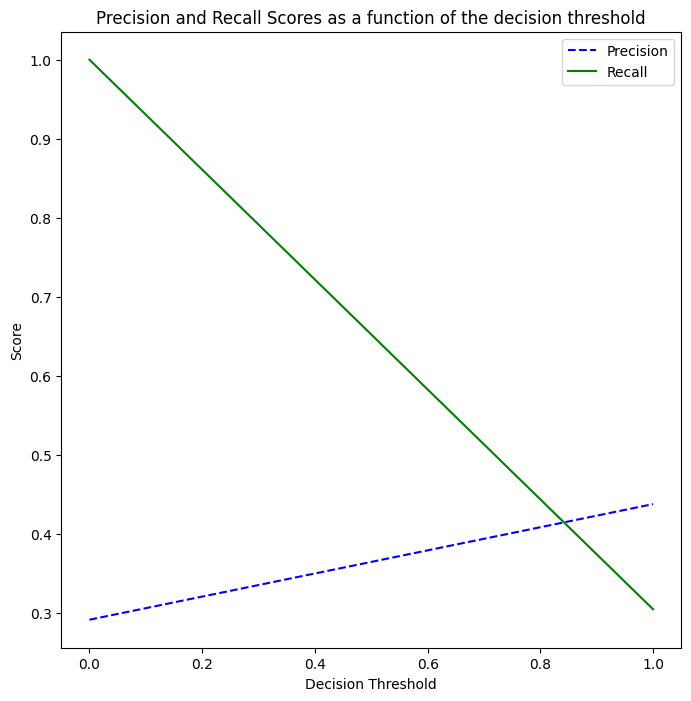

In [46]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# generate the probabilities on the test set; here we could use any model
Y_probs = best_knn1.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

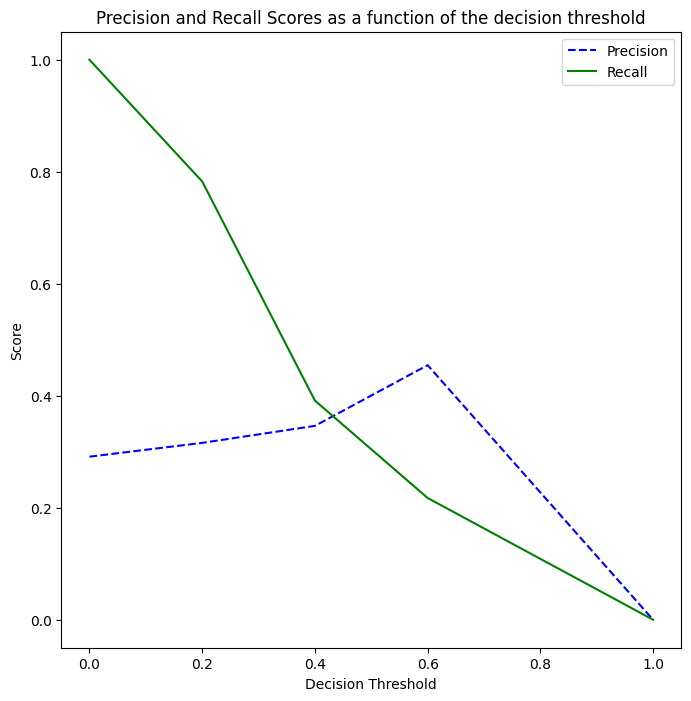

In [47]:
Y_probs = best_knn2.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

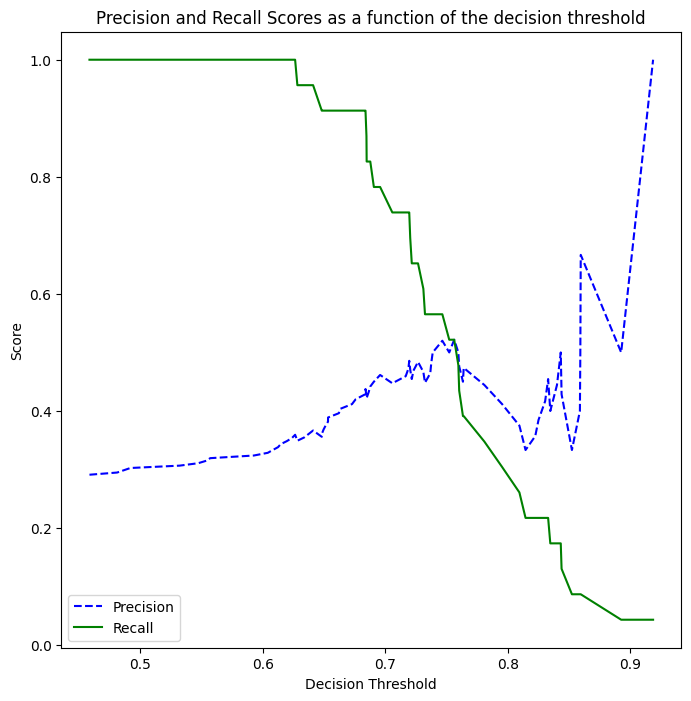

In [48]:
Y_probs = model_RFC.predict_proba(X_test)[0:,1]
# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

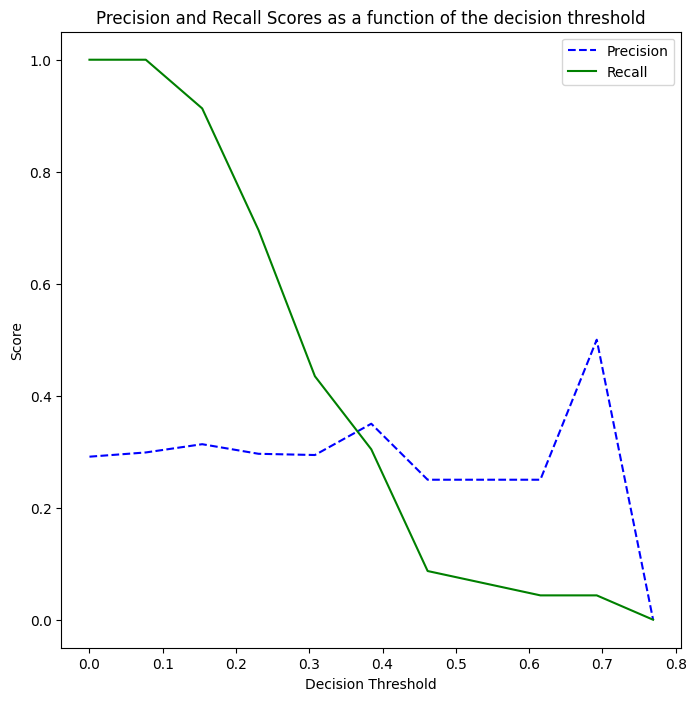

In [51]:
Y_probs = best_knn3.predict_proba(X_test)[0:,1]
# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [66]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
MNB =GridSearchCV(model,param,cv=5,scoring="recall")  
MNB.fit(X_train, Y_train)
MNB.best_params_


{'alpha': 1e-05}

In [67]:
best_MNB = MNB.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, best_MNB.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, best_MNB.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.73      0.82      0.77        56
        True       0.38      0.26      0.31        23

    accuracy                           0.66        79
   macro avg       0.55      0.54      0.54        79
weighted avg       0.63      0.66      0.64        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.81      0.88      0.84       130
        True       0.63      0.50      0.56        54

    accuracy                           0.77       184
   macro avg       0.72      0.69      0.70       184
weighted avg       0.76      0.77      0.76       184



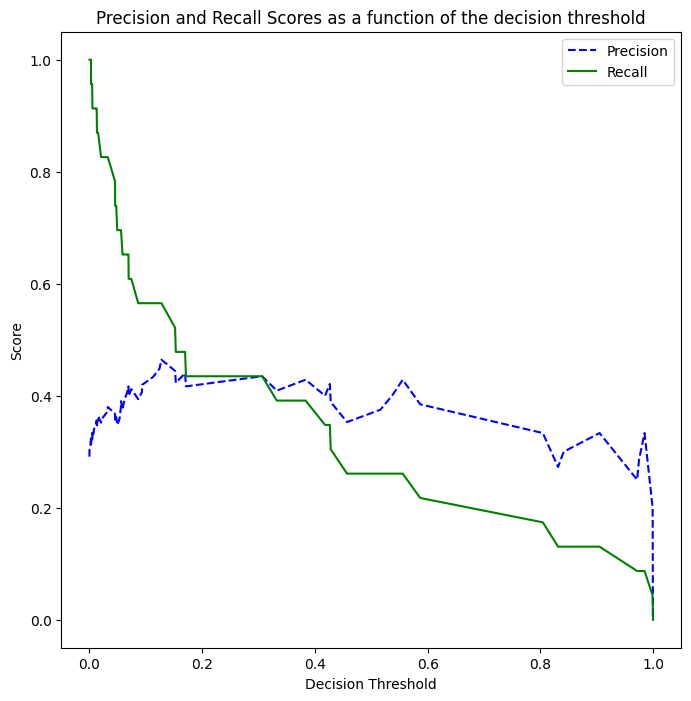

In [56]:
#improving model beyond hyper parameter using threshold
Y_probs = best_MNB.predict_proba(X_test)[0:,1]
# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [59]:
def best_recall_threshold(model,X_test,Y_test,lower_bound, upper_bound):
    # Method to apply threshold at maximum recall within threshold range
    Y_probs = model.predict_proba(X_test)[0:,1]
    precisions, recalls, thresholds = precision_recall_curve(Y_test, Y_probs)
    max_recall = 0
    max_recall_index = 0
    for i in range(0,len(thresholds)):
        if thresholds[i] > lower_bound and thresholds[i] < upper_bound:
            if recalls[i] > max_recall:
                max_recall = recalls[i]
                max_recall_index = i
    return thresholds[max_recall_index]
        
            
        


In [60]:
max_recall_thresh = best_recall_threshold(best_MNB, X_test, Y_test,0.1,0.9)

In [61]:
Y_test_pred_new_threshold = (best_MNB.predict_proba(X_test)[:, 1] >= max_recall_thresh)
Y_train_pred_new_threshold = (best_MNB.predict_proba(X_train)[:, 1] >= max_recall_thresh)
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, Y_test_pred_new_threshold)}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, Y_train_pred_new_threshold)}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.80      0.70      0.74        56
        True       0.43      0.57      0.49        23

    accuracy                           0.66        79
   macro avg       0.61      0.63      0.62        79
weighted avg       0.69      0.66      0.67        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.84      0.72      0.78       130
        True       0.50      0.67      0.57        54

    accuracy                           0.71       184
   macro avg       0.67      0.69      0.67       184
weighted avg       0.74      0.71      0.72       184



In [68]:
max_recall_thresh

0.11270125915693875

In [69]:
max_recall_thresh = best_recall_threshold(best_knn2, X_test, Y_test,0.1,0.9)
Y_test_pred_new_threshold = (best_knn2.predict_proba(X_test)[:, 1] >= max_recall_thresh)
Y_train_pred_new_threshold = (best_knn2.predict_proba(X_train)[:, 1] >= max_recall_thresh)
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, Y_test_pred_new_threshold)}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, Y_train_pred_new_threshold)}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.77      0.30      0.44        56
        True       0.32      0.78      0.45        23

    accuracy                           0.44        79
   macro avg       0.54      0.54      0.44        79
weighted avg       0.64      0.44      0.44        79

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.35      0.51       130
        True       0.39      1.00      0.56        54

    accuracy                           0.54       184
   macro avg       0.69      0.67      0.54       184
weighted avg       0.82      0.54      0.53       184

